In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir, "datasets", "Train")
test_path=os.path.join(curr_dir, "datasets", "Test")
valid_path= os.path.join(curr_dir, "datasets", "Valid")

Current Dir  c:\Users\prajw\Desktop\POTATO-DISEASE-PROJECT


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear"
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear"
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

C:\Users\prajw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']
)

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set, validation_data=validation_set,epochs=15)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 837ms/step - accuracy: 0.3586 - loss: 3.8633 - val_accuracy: 0.3333 - val_loss: 1.0963
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 755ms/step - accuracy: 0.3523 - loss: 1.1002 - val_accuracy: 0.4167 - val_loss: 1.0932
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 751ms/step - accuracy: 0.3823 - loss: 1.0837 - val_accuracy: 0.3700 - val_loss: 1.0920
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 747ms/step - accuracy: 0.4254 - loss: 1.0336 - val_accuracy: 0.4033 - val_loss: 1.0818
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 764ms/step - accuracy: 0.4498 - loss: 1.0477 - val_accuracy: 0.5467 - val_loss: 0.9653
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 734ms/step - accuracy: 0.6818 - loss: 0.7324 - val_accuracy: 0.7000 - val_loss: 1.1973
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 769ms/step - accuracy: 0.6436 - loss: 0.9877 - val_accuracy: 0.7367 - val_loss: 0.6279
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 746ms/step - accuracy: 0.7836 - loss: 0.5001 - val_accu

In [10]:
training_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.9001 - loss: 0.2479
Training accuracy: 0.8999999761581421


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation_accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.8443 - loss: 0.3241
validation_accuracy: 0.8500000238418579


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.38555556535720825,
  0.3588888943195343,
  0.3888888955116272,
  0.49444442987442017,
  0.5255555510520935,
  0.6911110877990723,
  0.6644444465637207,
  0.801111102104187,
  0.8633333444595337,
  0.8655555844306946,
  0.8955555558204651,
  0.8866666555404663,
  0.7344444394111633,
  0.7555555701255798,
  0.8366666436195374],
 'loss': [2.072577714920044,
  1.1039234399795532,
  1.068151831626892,
  0.9750161170959473,
  0.9984550476074219,
  0.7268213033676147,
  0.8704327940940857,
  0.4402315020561218,
  0.3280874192714691,
  0.3499448895454407,
  0.25757187604904175,
  0.23620925843715668,
  0.986045241355896,
  0.6460421681404114,
  0.41196784377098083],
 'val_accuracy': [0.3333333432674408,
  0.4166666567325592,
  0.3700000047683716,
  0.4033333361148834,
  0.54666668176651,
  0.699999988079071,
  0.7366666793823242,
  0.8266666531562805,
  0.7699999809265137,
  0.8700000047683716,
  0.8666666746139526,
  0.8666666746139526,
  0.7266666889190674,
  0.73666667938232

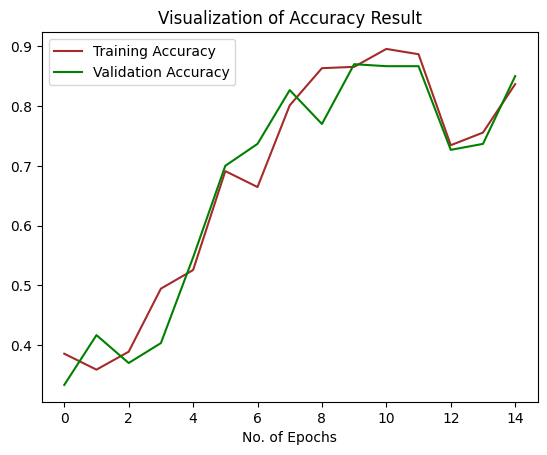

In [14]:
# To plot the training and validation accuracy:
epochs = [i for i in range(1, 11)]
plt.plot(training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()